# Movie Recommendor

We'll start by importing the MovieLens 100K data set into a pandas DataFrame:

In [202]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [203]:
#To detect the outlier we will see the distibution of ratings per user
#here we are going to create a new dataframe that will provide the number of total movies each user has rated 
import numpy as np
new_df = ratings.groupby('user_id').agg({'title': [np.size]})
new_df.head()

,title
,size
user_id,
0,3
1,272
2,62
3,54
4,24


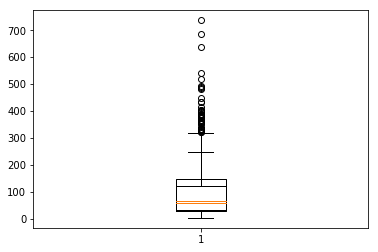

In [204]:
import matplotlib.pyplot as plt 
plt.boxplot(new_df['title']['size'])
plt.show()

In [212]:
#we will not delete the outliers, rather we'll scale them to a definite range
new_df1 = new_df[new_df['title']['size']<= 250]
plt.boxplot(new_df1['title']['size'])
new_df1.max()

title  size    249
dtype: int64

In [215]:
mylist= list(new_df1.index)
mask = ratings['user_id'].isin(mylist)
ratings= ratings[mask]
ratings.head()

,movie_id,title,user_id,rating
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
4,1,Toy Story (1995),66,3
5,1,Toy Story (1995),5,4
6,1,Toy Story (1995),109,4


Now we'll pivot this table to construct a nice matrix of users and the movies they rated. NaN indicates missing data, or movies that a given user did not watch:

In [216]:
#now we have no outliers. lets move on
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0


Now the magic happens - pandas has a built-in corr() method that will compute a correlation score for every column pair in the matrix! This gives us a correlation score between every pair of movies (where at least one user rated both movies - otherwise NaN's will show up.) That's amazing!

In [217]:
corrMatrix = userRatings.corr()
corrMatrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.000000,-0.158471,1.000000,0.191741,2.411214e-02,0.011902,NaN,0.534522,...,NaN,-0.117267,NaN,NaN,0.177239,0.430331,0.738549,0.500000,0.866025,NaN
12 Angry Men (1957),NaN,NaN,-0.158471,1.000000,NaN,0.062017,5.735393e-02,0.213323,NaN,0.363696,...,1.0,0.158666,-0.342997,NaN,0.183948,-0.153093,-0.375000,NaN,NaN,NaN
187 (1997),NaN,NaN,1.000000,NaN,1.000000,0.258199,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,0.191741,0.062017,0.258199,1.000000,NaN,0.346569,NaN,NaN,...,NaN,-0.194257,0.632456,NaN,0.271810,0.292770,0.396863,-0.274352,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,0.024112,0.057354,NaN,NaN,1.000000e+00,0.225113,NaN,-0.205557,...,NaN,NaN,0.250000,NaN,-0.161015,0.156174,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,0.011902,0.213323,-0.426401,0.346569,2.251126e-01,1.000000,NaN,0.473972,...,1.0,0.290321,-0.142331,NaN,0.092469,-0.312154,-0.305556,-0.458333,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, we want to avoid spurious results that happened from just a handful of users that happened to rate the same pair of movies. In order to restrict our results to movies that lots of people rated together - and also give us more popular results that are more easily recongnizable - we'll use the min_periods argument to throw out results where fewer than 200 users rated a given movie pair:

In [218]:
corrMatrix = userRatings.corr(method='pearson', min_periods =100 )
corrMatrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for user ID 0, who I manually added to the data set as a test case. This guy really likes Star Wars and The Empire Strikes Back, but hated Gone with the Wind. I'll extract his ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving me only with a Series of the movies I actually rated:)

In [130]:
myRatings = userRatings.loc[0].dropna()
myRatings

KeyError: 'the label [0] is not in the [index]'

Now, let's go through each movie I rated one at a time, and build up a list of possible recommendations based on the movies similar to the ones I rated.

So for each movie I rated, I'll retrieve the list of similar movies from our correlation matrix. I'll then scale those correlation scores by how well I rated the movie they are similar to, so movies similar to ones I liked count more than movies similar to ones I hated:

In [28]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    # Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Star Wars (1977)                             5.000000
Empire Strikes Back, The (1980)              5.000000
Empire Strikes Back, The (1980)              3.741763
Star Wars (1977)                             3.741763
Return of the Jedi (1983)                    3.606146
Return of the Jedi (1983)                    3.362779
Raiders of the Lost Ark (1981)               2.693297
Raiders of the Lost Ark (1981)               2.680586
Sting, The (1973)                            1.837692
Indiana Jones and the Last Crusade (1989)    1.750535
dtype: float64


This is starting to look like something useful! Note that some of the same movies came up more than once, because they were similar to more than one movie I rated. We'll use groupby() to add together the scores from movies that show up more than once, so they'll count more:

In [29]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()

In [43]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

Empire Strikes Back, The (1980)              8.741763
Star Wars (1977)                             8.741763
Return of the Jedi (1983)                    6.968925
Raiders of the Lost Ark (1981)               5.373883
Indiana Jones and the Last Crusade (1989)    3.316717
Back to the Future (1985)                    3.100622
Star Trek: The Wrath of Khan (1982)          2.968080
Jaws (1975)                                  2.802935
Aliens (1986)                                2.735102
Princess Bride, The (1987)                   2.729964
dtype: float64

The last thing we have to do is filter out movies I've already rated, as recommending a movie I've already watched isn't helpful:

In [44]:
filteredSims = pd.DataFrame()
for x in myRatings.index:
    if x in simCandidates.index:
        filteredSims = simCandidates.drop(x)
filteredSims.head(10)

Empire Strikes Back, The (1980)              8.741763
Return of the Jedi (1983)                    6.968925
Raiders of the Lost Ark (1981)               5.373883
Indiana Jones and the Last Crusade (1989)    3.316717
Back to the Future (1985)                    3.100622
Star Trek: The Wrath of Khan (1982)          2.968080
Jaws (1975)                                  2.802935
Aliens (1986)                                2.735102
Princess Bride, The (1987)                   2.729964
Terminator, The (1984)                       2.715105
dtype: float64

There we have it!